# Guided Activity Two
## Simple Harmonic Oscillators

Time for some more Python!

This time we will be exploring simple harmonic oscillators (SHOs). A naive simple Euler method implementation fails to model SHOs accurately because energy is "not conserved" with each iteration. Later we will apply a fix for this.

Step zero is our library imports. We use `matplotlib.pyplot` for graphing, and `numpy` for rapid numerical calculations. The `%inline` is a IPython *magic* command to enforce in notebook plotting and prevent the formation of new windows.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

As before, we will build a set of tools that we can use to solve our assignment questions. I will start by encapsulating the exact acceleration function in a Python function.

$$
    a(t) = -\frac{k}{m} x^2
$$

In Python, we get the function,

In [2]:
def acceleration(x, v, k, m):
    ''' Returns acceleration of a simple harmonic oscillator based on position

        Uses the equation:

                a(t) = - (k/m) x**2

        Args:
            x (float):  displacement, downwards positive (m)
            v (float):  velocity, ignored (m)
            k (float):  spring constant (N/m)
            m (float):  mass (kg)

        Returns:
            float:  acceleration, downwards positive (m/s**2)
    '''

    return -1 * (k/m) * x

From classical physics, we know that the period of an SHO is:

$$ T = 2\pi\sqrt{\frac{m}{k}} $$

And in Python, this goes something like,

In [3]:
def oscillator_period(m, k):
    ''' Return the period, T, of a simple harmonic oscillator.

    Uses:

        T = 2 * pi * sqrt(m / k)

    Args:
        m (float):  mass (kg)
        k (float):  spring constant (N/m)

    Returns:
        float:  period (s)
    '''

    return 2 * np.pi * np.sqrt(m / k)

Similarly, the angular frequency of an oscillator is:

$$
    \omega = \frac{2\pi}{T}
$$

To enforce the DRY principle (do not repeat yourself), we will derrive angular frequency from the period rather than from base units.

In [4]:
def oscillator_angular_frequency(m, k):
    ''' Return the period, T, of a simple harmonic oscillator.

    Uses:

        w = 2*pi / T

    Args:
        m (float):  mass (kg)
        k (float):  spring constant (N/m)

    Returns:
        float:  angular frequency (rad/s)
    '''

    return 2 * np.pi / oscillator_period(m, k)

Energy in a SHO, at any instant, is given by the equation:

$$
    E = U_k + U_p + U_g
$$

$$
    E = \frac{1}{2}mv^2 + \frac{1}{2}k(y + y_0)^2 - mg(y + y_0)
$$

In python, we have the function,

In [5]:
def oscillator_energy(x, v, k, m, g=9.80665):
    ''' Return the energy (J) in an oscillator at any instant of time.
    
        Uses equation:
        
            E = 0.5*mv**2 + 0.5*k * x**2 - mgx
            
        Assuming the oscillators equilibrium position is 0 m.
        
        Args:
            x (float):   displacement (m)
            v (float):   velocity (m/s)
            k (float):   spring constant (N/m)
            m (float):   mass (kg)
            
        Returns:
            float:    energy of system (J)
    
    '''
    
    y_eq = m * g / k
    
    return 0.5 * m * np.power(v, 2) + 0.5 * k * np.power(x + y_eq, 2) - m * g * (x + y_eq)

We will try to encourage code reuse by modifying our previous euler function. This new function has a keyword option that allows ther caller to specify "modified Euler". Also, the function accepts an `acceleration` function so that its can work with any forcing function (simple harmonic oscillator or free-fall).

In [6]:
def euler_method(acceleration, t0, tf, dt, x0=0, v0=0, modified=False, verbose=False, **kwargs):
    ''' Returns t, x, v, and a lists for Modified Euler Method

        Args:
            acceleration (func):  a function that accepts x, v, and **kwargs and 
                                      return acceleration.
            t0 (float):           initial time (s)
            tf (float):           final time (s)
            dt (float):           time step (s)
            x0 (float):           initial displacement, downwards positive (m)
            v0 (float):           intiial velocity, downwards positive (m/s)
            **kwargs:             any additional arguments required for the 
                                      accleration function

            modified (bool):	turns on modified euler method.
            verbose (bool):		turns on printing of each time-step.

        Returns:
            float (list): lisf times (s)
            float (list): list of positions, downwards positive (m)
            float (list): list of velocities, downwards positive (m/s)
            float (list): list of acceleration, downwards positive (m/s**2)
    '''

    t = t0
    x = x0
    v = v0
    a = acceleration(x, v, **kwargs)

    t_num = [t]
    x_num = [x]
    v_num = [v]
    a_num = [a]

    while t < tf:
        if verbose: print('{:.3f} {:.3f} {:.3f} {:.3f}'.format(t, x, v, a))
            
        a = acceleration(x, v, **kwargs)
        t += dt

        if modified:
            v += dt * a
            x += dt * v
        else:
            x += dt * v
            v += dt * a

        t_num.append(t)
        x_num.append(x)
        v_num.append(v)
        a_num.append(a)

    return t_num, x_num, v_num, a_num

As with the previous guided activity, classical physics gives us an exact solution for both displacement and velocity:

$$
    x(t) = x_0 \cos\left(\sqrt{\frac{k}{m}t}\right)
$$

and, 

$$
    v(t) = -x_0\sqrt{\frac{k}{m}}\sin\left(\sqrt{\frac{k}{m}}t\right)
$$

We will also build a convenience function for returning the exact position, velocity, and acceleration in the same format as our Euler method function.

In [7]:
def exact_position(t, x0, k, m):
    ''' Returns position as determined by analytical SHO position.
    
        Uses:
            
            x(t) = x_0 * cos(sqrt(k/m)*t)
            
        Args:
            t (float):   time (s)
            x0 (float):  initial displacement, downwards positive (m)
            k (float):   spring constant (N/m)
            m (float):   mass (kg)
            
        Returns:
            float: displacement (m)
    '''
    
    return x0 * np.cos(np.sqrt(k / m) * t)

def exact_velocity(t, x0, k, m):
    ''' Returns velocity as determined by analytical SHO position.
    
        Uses:
            
            x(t) = -x_0 * sqrt(k/m) * sin(sqrt(k/m)*t)
            
        Args:
            t (float):   time (s)
            x0 (float):  initial displacement, downwards positive (m)
            k (float):   spring constant (N/m)
            m (float):   mass (kg)
            
        Returns:
            float: displacement (m)
    '''
    
    return -1 * x0 * np.sqrt(k / m) * np.sin(np.sqrt(k / m) * t)

def exact_oscillator(times, x0, k, m):
    ''' Returns t, x, v, and a lists based on analytical solution to SHO.

        Args:
            times (list):  list of times to calculate x, v, and a (s)
            x0 (float):    initial displacement, downwards positive (m)
            k (float):     spring constant (N/m)
            m (float):     mass (kg)

        Returns:
            float (list): lisf times (s)
            float (list): list of positions, downwards positive (m)
            float (list): list of velocities, downwards positive (m/s)
            float (list): list of acceleration, downwards positive (m/s**2)
    '''

    t_ext = np.asarray(times)
    x_ext = exact_position(t_ext, x0=x0, k=k, m=m)
    v_ext = exact_velocity(t_ext, x0=x0, k=k, m=m)
    a_ext = acceleration(x_ext, v_ext, k=k, m=m)
    
    return t_ext, x_ext, v_ext, a_ext

### Excercise 1: Euler Algorithm Model of a SHO

Build a computational model of a simple hanging harmonic oscillator using the Euler method with MATLAB or C. Use realistic values for the parameters (i.e., spring constant k and attached mass m) such as would be encountered in a typical introductory mechanics laboratory exercise. Also, assume that the mass of the spring is negligible compared to the attached mass, and that the harmonic oscillator has been stretched vertically downward a distance $y_{0}$, relative to its hanging equilibrium position and released from rest. Use the model to produce graphs of the position and velocity of the mass as a function of time, and compare these with the exact functions for the position and velocity, 

$$y(t)=y_{0}\cos\left(\sqrt{\frac{k}{m}}t\right)$$

and,

$$v(t)=-\sqrt{\frac{k}{m}}y_{0}\sin\left(\sqrt{\frac{k}{m}}t\right)$$,

that result from solving Newton’s 2nd Law analytically. Does the angular frequency match that expected for a simple harmonic oscillator of mass m and spring constant k?

#### Solution 1:

The first step is to identify realistic values for $k$ and $m$. A standard physics classroom will have 250 g calibration masses and a meter stick. Therefore a a spring constant, k, of 2.5 N/m sounds normal.

In [8]:
k = 2.5
m = 0.250
x0 = 0.10

t0 = 0
tf = 15
dt = 0.01

Now, with our parameters we can run the numerical and exact models.

In [9]:
t_num, x_num, v_num, a_num = euler_method(acceleration, t0=t0, x0=x0, v0=0, 
                                             tf=tf, dt=dt, k=k, m=m)

t_ext, x_ext, v_ext, a_ext = exact_oscillator(t_num, x0=x0, k=k, m=m)

We can calculated the expected period.

In [10]:
T = oscillator_period(k=k, m=m)

Now we can plot our two functions.

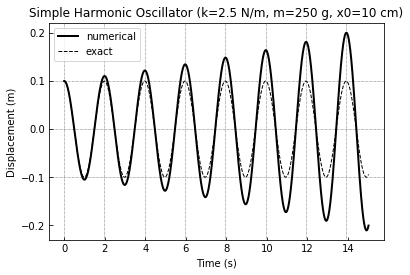

In [11]:
plt.plot(t_num, x_num, label='numerical', linestyle='-', color='black', linewidth=2)
plt.plot(t_ext, x_ext, label='exact', linestyle='--', color='black', linewidth=1)

plt.tick_params(which='both', direction='in')

# Gridlines
plt.axhline(0,   linestyle=':', color='black', linewidth=0.5)
plt.axhline(x0,  linestyle=':', color='black', linewidth=0.5)
plt.axhline(-x0, linestyle=':', color='black', linewidth=0.5)

t = t0
while t < tf:
    plt.axvline(t, linestyle=':', color='black', linewidth=0.5)
    t += T

plt.title('Simple Harmonic Oscillator (k=2.5 N/m, m=250 g, x0=10 cm)')
plt.ylabel('Displacement (m)')
plt.xlabel('Time (s)')

plt.legend(['numerical', 'exact'])

plt.show()

By simple visual inspection, the peaks of both the numerical and exact solutions seem to line up on period markers; however, we can use a peak detection algorithm to get a more precise answer.

In [12]:
def dominant_frequency(t, x):
    ''' Return dominant frequency of signal in Hz. 
    
        Performs a FFT and returns the frequency of the strongest frequency
        in the sample.
        
        Args:
            t (list):  times (s)
            x (list):  response (unitless)
            
        Returns:
            float:  strongest frequency (Hz)
    
    '''
    from scipy import fftpack

    # Find the sample rate
    dt = t[1] - t[0]
    
    # Perform FFT
    amplitudes  = fftpack.fft(x)
    frequencies = fftpack.fftfreq(len(x)) / dt

    # Return the frequency with maximum amplitude.
    return np.abs(frequencies[amplitudes.argmax()])

The algorithm is based on a fast fourier transform which requires a lot of sample to accurately identify frequencies. We will run our simulation out to 1000 (s) and then find the dominant frequency of the oscillation.

In [13]:
t, x, v, a = euler_method(acceleration, t0=t0, x0=x0, v0=0, tf=1000, dt=dt, 
                                    modified=False, verbose=False, k=k, m=m)

print('Spring frequency: {} Hz'.format(1 / dominant_frequency(t, x)))

Spring frequency: 2.00004 Hz


Alright, I'm still not very happy with the resolution the FFT can provide. Let's try implmenting code to count the time between successive zero-crossings. I plan to leverage the root finding algorithms in numpy.

In [14]:
def list_roots(ts, xs):
    ''' Returns times, t, for which x crosses zero. 
    
        Naive implmentation that simply notes the time when,
        x has changed sign and interpolates root linearly 
        beteween two closest points.
    
        Args:
            ts (list): 1-D array containing times (s)
            xs (list): 1-D array containing positions (m)
            
        Returns:
            list (float): list of times where x crosses zero.
    '''
    
    roots = []
    for i, _ in enumerate(ts):
        try:
            if np.sign(xs[i]) != np.sign(xs[i + 1]):
                m, b = np.polyfit([ts[i], ts[i + 1]],
                                  [xs[1], xs[i + 1]],
                                   1)
                                   
                roots.append(-b / m)
                                   
        except IndexError:
            pass
            
    return roots

In [15]:
def list_periods(ts, xs):
    ''' Returns the period of a sin wave by counting zero crossings. 
    
        Args:
            ts (list): 1-D array containing times (s)
            xs (list): 1-D array containing positions (m)
            
        Returns:
            list (float): list of periods, T, for inputed sign wave.        
    '''
    
    roots = np.asarray(list_roots(ts, xs))        
    return roots[2:] - roots[0:-2]

Now we can test if the period of our Euler function matches what we would expect analytically.

In [16]:
T_num = np.average(list_periods(t_num, x_num))
T_ext = oscillator_period(m, k)

rel_error = (T_num - T_ext) / T_ext

print('Numerical Period:  {:.2f}(s)'.format(T_num))
print('Analytical Period: {:.2f}(s)'.format(T_ext))
print('Error: {:.1f}%'.format(rel_error * 100))

Numerical Period:  1.99(s)
Analytical Period: 1.99(s)
Error: 0.0%


Essentially, yes, the period of the numerical solution (and therefore the angular frequency) is exact.

### Exercise 2: Artificial Behavior with the Euler Algorithm 

You may (should!) have noticed that something is not right with the Euler model of your hanging oscillator. Describe in detail the artificial behavior you observe in your model, and explain why it doesn’t represent a realistic oscillating mass. Recall that in the Euler method, the accuracy of the solution can be increased by using a smaller value of $\Delta t$. Can you get rid of the artificial behavior by making $\Delta t$ smaller? 

#### Solution 2:

As we can see in the above plot, the amplitude of the euler modeled SHO increases with time. This essentially means that the energy of the oscillator is increasing with time (which is impossible). 

Let's see how the size of $\Delta t$ affects the amplitude problem.

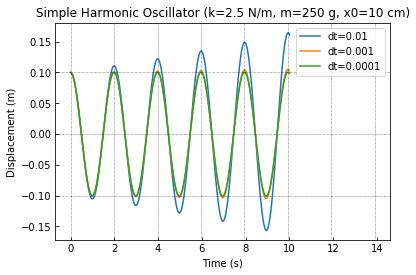

In [17]:
for dt in [0.01, 0.001, 0.0001]:
    t, x, v, a = euler_method(acceleration, t0=t0, x0=x0, tf=10, dt=dt, k=k, m=m)

    plt.plot(t, x, label='dt={}'.format(dt), linestyle='-')


plt.tick_params(which='both', direction='in')

# Gridlines
plt.axhline(0,   linestyle=':', color='black', linewidth=0.5)
plt.axhline(x0,  linestyle=':', color='black', linewidth=0.5)
plt.axhline(-x0, linestyle=':', color='black', linewidth=0.5)

t = t0
while t < tf:
    plt.axvline(t, linestyle=':', color='black', linewidth=0.5)
    t += T

plt.title('Simple Harmonic Oscillator (k=2.5 N/m, m=250 g, x0=10 cm)')
plt.ylabel('Displacement (m)')
plt.xlabel('Time (s)')

plt.legend(['dt={}'.format(dt) for dt in [0.01, 0.001, 0.0001]])

plt.show()

From the graph, it is clear the finer timesteps do improve the problem.

### Exercise 3: Energy in the Euler Algorithm Model of a SHO 

Modify your model to produce a graph of the total energy of the oscillator as a function of time. Describe in detail what happens to the energy, and the artificial behavior observed. Can this artificial behavior in the energy be corrected by making $\Delta t$ smaller? What can you conclude about using the Euler method to model a simple harmonic oscillator?

#### Solution 3:

We already have a convenient function for reporting the energy of an oscillator given parameters for position and velocity, let's just use that to plot an Energy v. Time graph for several size timesteps.

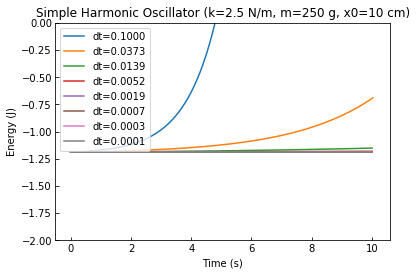

In [25]:
timesteps = np.logspace(-1, -4, 8)
for dt in timesteps:
    t, x, v, a = euler_method(acceleration, t0=t0, x0=x0, v0=0, tf=10, dt=dt, modified=False, verbose=False, k=k, m=m)
    plt.plot(t, oscillator_energy(np.asarray(x), np.asarray(v), m=m, k=k), label='dt={}'.format(dt))

plt.tick_params(which='both', direction='in')
plt.title('Simple Harmonic Oscillator (k=2.5 N/m, m=250 g, x0=10 cm)')
plt.ylabel('Energy (J)')
plt.xlabel('Time (s)')
plt.ylim([-2, 0])

plt.legend(['dt={:.4f}'.format(dt) for dt in timesteps])

plt.show()

Clearly __energy__ is not being conserved in when modeling SHOs with the simple Euler method. Larger timesteps only exacerbate the problem, and worse the error accumulates exponentially!

### Exercise 4: Euler-Cromer Algorithm Model of a SHO 

Build a model of the hanging oscillator using the modified Euler, or Euler-Cromer, numerical method. Compare the results you obtain (i.e. position and velocity vs. time) with those obtained from the simple Euler method, and with the exact solution. Comment in detail on your results.

#### Solution 4:

If you scoll back up to `def euler_method()` you will see that I have already implemented an option for switching to the *modified Euler method*. We can use that and replot.

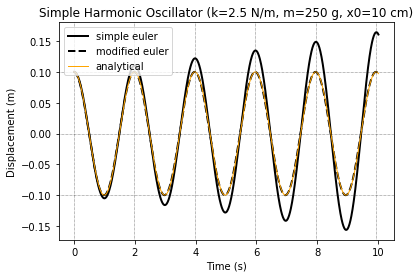

In [19]:
tf = 10
t_num, x_num, v_num, a_num = euler_method(acceleration, t0=t0, x0=x0, tf=tf, dt=0.01, k=k, m=m)
t_mod, x_mod, v_mod, a_mod = euler_method(acceleration, t0=t0, x0=x0, tf=tf, dt=0.01, k=k, m=m, modified=True)
t_ext, x_ext, v_ext, a_ext = exact_oscillator(t_num, x0=x0, k=k, m=m)

plt.plot(t_num, x_num, color='black', linewidth=2, linestyle='-', label='simple euler')
plt.plot(t_mod, x_mod, color='black', linewidth=2, linestyle='--', label='modified euler')
plt.plot(t_ext, x_ext, color='orange', linewidth=1, linestyle='-', label='analytical')

# Gridlines
plt.axhline(0,   linestyle=':', color='black', linewidth=0.5)
plt.axhline(x0,  linestyle=':', color='black', linewidth=0.5)
plt.axhline(-x0, linestyle=':', color='black', linewidth=0.5)

t = t0
while t < tf:
    plt.axvline(t, linestyle=':', color='black', linewidth=0.5)
    t += T

plt.title('Simple Harmonic Oscillator (k=2.5 N/m, m=250 g, x0=10 cm)')
plt.ylabel('Displacement (m)')
plt.xlabel('Time (s)')
plt.legend()

plt.show()

Even with a modest timestep of 0.01 (s), the modified euler (black, dashed) lays directly over the analytical solution (orange). Further, unlike the simple euler (black, solid), the amplitude of the modified Euler does not incearse with time. 

### Exercise 5: Energy in the Euler-Cromer Algorithm Model of a SHO 

Modify your model to produce a graph of the total energy as a function of time. Is energy conserved for the Euler-Cromer algorithm?

#### Solution 5: 

We can simply reuse the code from __Solution 3__ with the `modified=True` flag set.

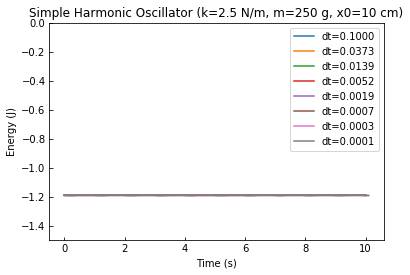

In [20]:
timesteps = np.logspace(-1, -4, 8)
for dt in timesteps:
    t, x, v, a = euler_method(acceleration, t0=t0, x0=x0, v0=0, tf=10, dt=dt, modified=True, verbose=False, k=k, m=m)
    plt.plot(t, oscillator_energy(np.asarray(x), np.asarray(v), m=m, k=k), label='dt={}'.format(dt))

plt.tick_params(which='both', direction='in')
plt.title('Simple Harmonic Oscillator (k=2.5 N/m, m=250 g, x0=10 cm)')
plt.ylabel('Energy (J)')
plt.xlabel('Time (s)')
plt.ylim([-1.5, 0])

plt.legend(['dt={:.4f}'.format(dt) for dt in timesteps])

plt.show()

This is an odd graph, particularly when you zoom in on curve.

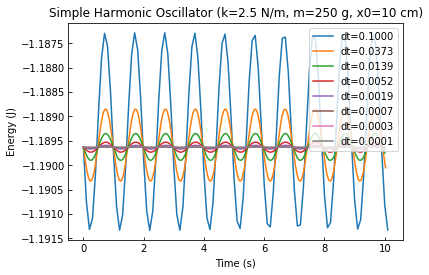

In [26]:
timesteps = np.logspace(-1, -4, 8)
for dt in timesteps:
    t, x, v, a = euler_method(acceleration, t0=t0, x0=x0, v0=0, tf=10, dt=dt, modified=True, verbose=False, k=k, m=m)
    plt.plot(t, oscillator_energy(np.asarray(x), np.asarray(v), m=m, k=k), label='dt={}'.format(dt))

plt.tick_params(which='both', direction='in')
plt.title('Simple Harmonic Oscillator (k=2.5 N/m, m=250 g, x0=10 cm)')
plt.ylabel('Energy (J)')
plt.xlabel('Time (s)')

plt.legend(['dt={:.4f}'.format(dt) for dt in timesteps])

plt.show()

In the simple euler method, the energy diverges wildly with time; however, the energy graph is a smooth curve. In the modified euler method, the energy (as a whole) does not diverge over time, but with each timestep exhibits this fine oscillation. I think this is mostly a noisy artifact and, in general, __energy is conserved in the Euler-Cromer method.__